In [1]:
import numpy as np
import pandas as pdz
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers


In [9]:
data_train_path = "C:\\Users\\Priyadharshni\\Documents\\SEMESTER IV\\Fruits_Vegetables\\Fruits_Vegetables\\test"
data_test_path =  "C:\\Users\\Priyadharshni\\Documents\\SEMESTER IV\\Fruits_Vegetables\\Fruits_Vegetables\\train"
data_val_path = "C:\\Users\\Priyadharshni\\Documents\\SEMESTER IV\\Fruits_Vegetables\\Fruits_Vegetables\\validation"

In [10]:
img_width = 180
img_height =180 

In [11]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 358 files belonging to 36 classes.


In [12]:
data_cat = data_train.class_names

In [13]:
data_cat

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [14]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       image_size=(img_height,img_width),
                                                       batch_size=32,
                                                        shuffle=False,
                                                       validation_split=False)

Found 351 files belonging to 36 classes.


In [15]:
data_test = tf.keras.utils.image_dataset_from_directory(
data_test_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 3115 files belonging to 36 classes.


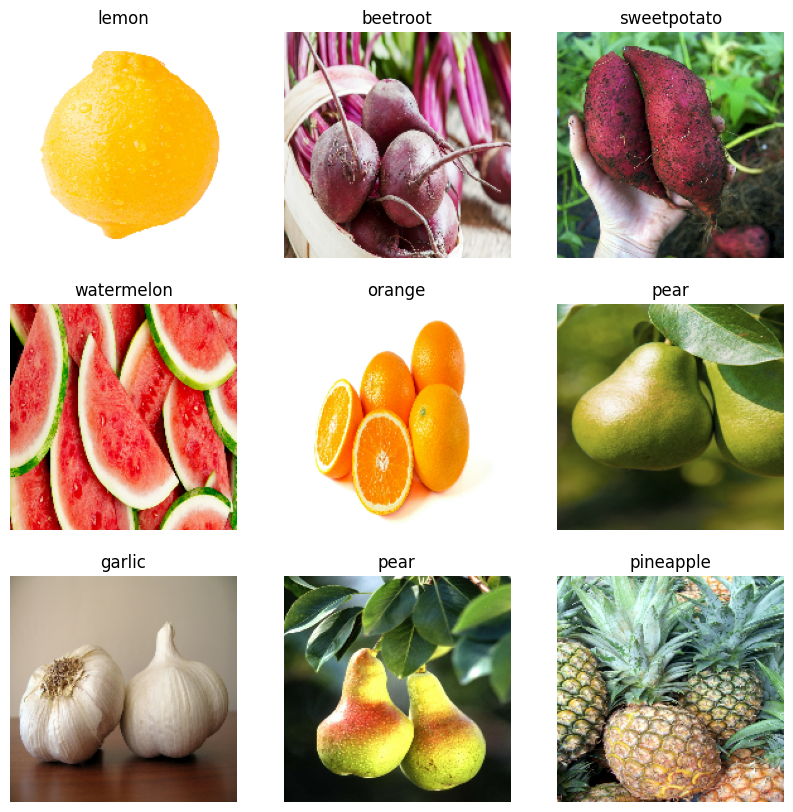

In [16]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [17]:
from tensorflow.keras.models import Sequential

In [18]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [76]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
                  
])

In [77]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [78]:
epochs_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 11s 719ms/step - accuracy: 0.0163 - loss: 4.0423 - val_accuracy: 0.0997 - val_loss: 3.4487
Epoch 2/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 665ms/step - accuracy: 0.1290 - loss: 3.4032 - val_accuracy: 0.2365 - val_loss: 3.0478
Epoch 3/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 655ms/step - accuracy: 0.2655 - loss: 2.9435 - val_accuracy: 0.4672 - val_loss: 2.1253
Epoch 4/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 673ms/step - accuracy: 0.4145 - loss: 2.2180 - val_accuracy: 0.7265 - val_loss: 1.4275
Epoch 5/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 686ms/step - accuracy: 0.6625 - loss: 1.4863 - val_accuracy: 0.8348 - val_loss: 0.9517
Epoch 6/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 716ms/step - accuracy: 0.8288 - loss: 0.9051 - val_accuracy: 0.8889 - val_loss: 0.4174
Epoch 7/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 700ms/step - accuracy: 0.8847 - loss: 0.4256 - val_accuracy: 0.9060 - val_loss: 0.3043
Epoch 8/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 718ms/step - accuracy: 0.8968 - loss: 0.4548 - val_accuracy: 0

Text(0.5, 1.0, 'Loss')

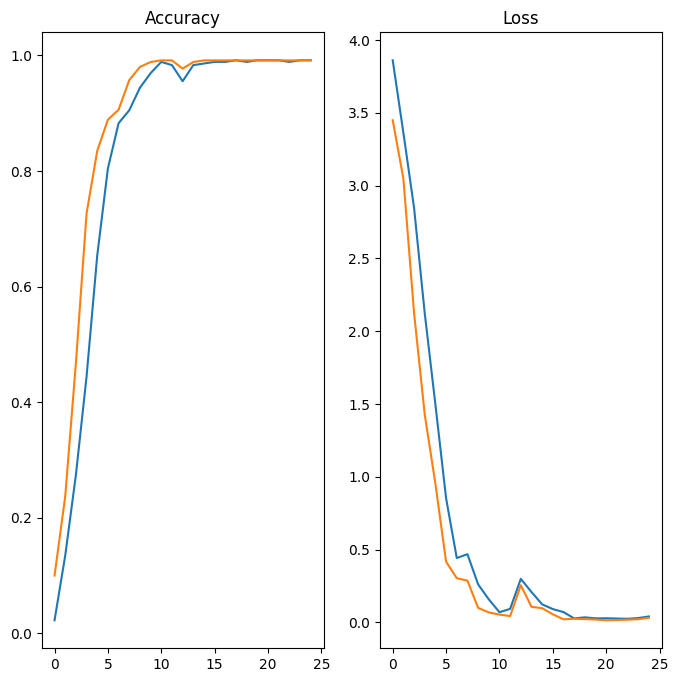

In [79]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [80]:
image = 'corn.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [81]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


In [82]:
score = tf.nn.softmax(predict)

In [83]:
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Veg/Fruit in image is sweetcorn with accuracy of 99.59


In [84]:
model.save('Image_classify.keras')